# Modelagem da Disseminação de Fake News e Informação Viral utilizando Equações Diferenciais Ordinárias

>Ênio Henrique Nunes Ribeiro (ehnr)

>Matheus Augusto monte Silva (mams4)

>Thiago Jose Grangeiro Costa (tjgc)

>Victória Xavier Queiroz (vxq)

# Resumo

Nos últimos anos, a crescente influência das redes sociais e da internet na disseminação de informações trouxe à tona uma preocupação significativa: a propagação de notícias falsas, conhecidas como "Fake News".Essas notícias fabricadas e enganosas têm o potencial de se espalhar rapidamente, alcançando um público amplo e, muitas vezes, causando impactos negativos na sociedade, como a desinformação, o enfraquecimento da confiança nas fontes de informação e a polarização. Dessa maneira, empresas e outras organizações buscam entender o alcance e a taxa de disseminação desse tipo de informação. Nesse contexo, o presente artigo tem como objetivo principal descrever a disseminação de informação viral através de Redes Sociais digitais ou não. Para isso utilizaremos o modelo ISTK de ODEs baseado no modelo SIR de doenças infecciosas.

Palavras-chave: ODEs, Fake News, Disseminação de informação

# Introdução

Os seres humanos, quando comparados a outras espécies do Reino Animal, revelam uma notável fragilidade. No entanto, a desenvolvimento da racionalidade desempenhou um papel fundamental em sua sobrevivência e subsequente êxito evolutivo. Este êxito é grandemente atribuído à capacidade humana de comunicação e cooperação em busca de objetivos comuns.

No livro "*Sapiens*", o renomado antropólogo e historiador Yuval Noah Harari destaca a função evolutiva da "fofoca" no desenvolvimento da sociedade moderna, evidenciando que rumores e boatos desempenharam um papel essencial na seleção de parceiros ou na identificação de áreas de caça mais abundantes [1]. Nesse contexto, é pertinente observar que os boatos podem abarcar tanto a verdade quanto a falsidade, acarretando, assim, em resultados que variam desde o sucesso em uma empreitada de caça até o embate fatal com uma armadilha, resultando na aniquilação da tribo. Assim, percebe-se claramente que os sapiens foram constantemente desafiados a discernir entre rumores verídicos e equivocados, visto que o desfecho desse discernimento se afigurava crucial para a sobrevivência da espécie.

Este dilema persiste até os dias atuais, uma vez que desde a infância, somos instruídos a lidar com rumores e boatos nas instituições sociais das quais fazemos parte, incluindo, porém não limitando-se, a igreja e a escola. No entanto, recentemente, tal problemática atingiu proporções mais amplas ao exercer influência tanto em processos eleitorais como no âmbito do enfrentamento da pandemia de *SARS-CoV-2*, através da disseminação das denominadas *Fake News*, ou seja, notícias falsas, que são predominantemente difundidas nas plataformas de mídia social com a intenção de manipular a opinião pública.

Nesse contexto, surge a necessidade de investigar e compreender o alcance e a influência que tais informações podem exercer sobre determinadas populações, a fim de estabelecer medidas para a contenção desses conteúdos, salvaguardando o livre-arbítrio dos indivíduos e contribuindo para a tomada de decisões mais informadas.

# Objetivos
Neste projeto, queremos entender como os rumores e boatos se espalham usando Equações Diferenciais Ordinárias (ODEs). Vamos usar um modelo chamado ISTK, que divide as pessoas em quatro grupos: os que não sabem (ignorantes), os que espalham (spreader), os que limitam (stifler) e os bem informados (knowledgeable).

É interessante notar que esse modelo se parece com aquele usado para prever a propagação de doenças (SIR), o que sugere que o jeito como informações falsas se espalham é bem parecido com uma infecção.

Nosso objetivo principal é descobrir o quão "viral" uma informação falsa pode se tornar. Isso vai ajudar as autoridades e as plataformas online, como as redes sociais, a tomarem medidas para evitar a disseminação dessas informações.

Vamos usar uma ferramenta chamada Google Colab para fazer os cálculos usando Python. Também vamos usar outras ferramentas como Matplotlib e NumPy para nos ajudar a entender os resultados.


# Mapa Mental

https://coggle.it/diagram/ZNHCJFpO0W45DFPc/t/rumores/ac2fdda8d6bbeb4cfcbfeab3f125350f0d4d686e036c18a93cdc3e67e61191de
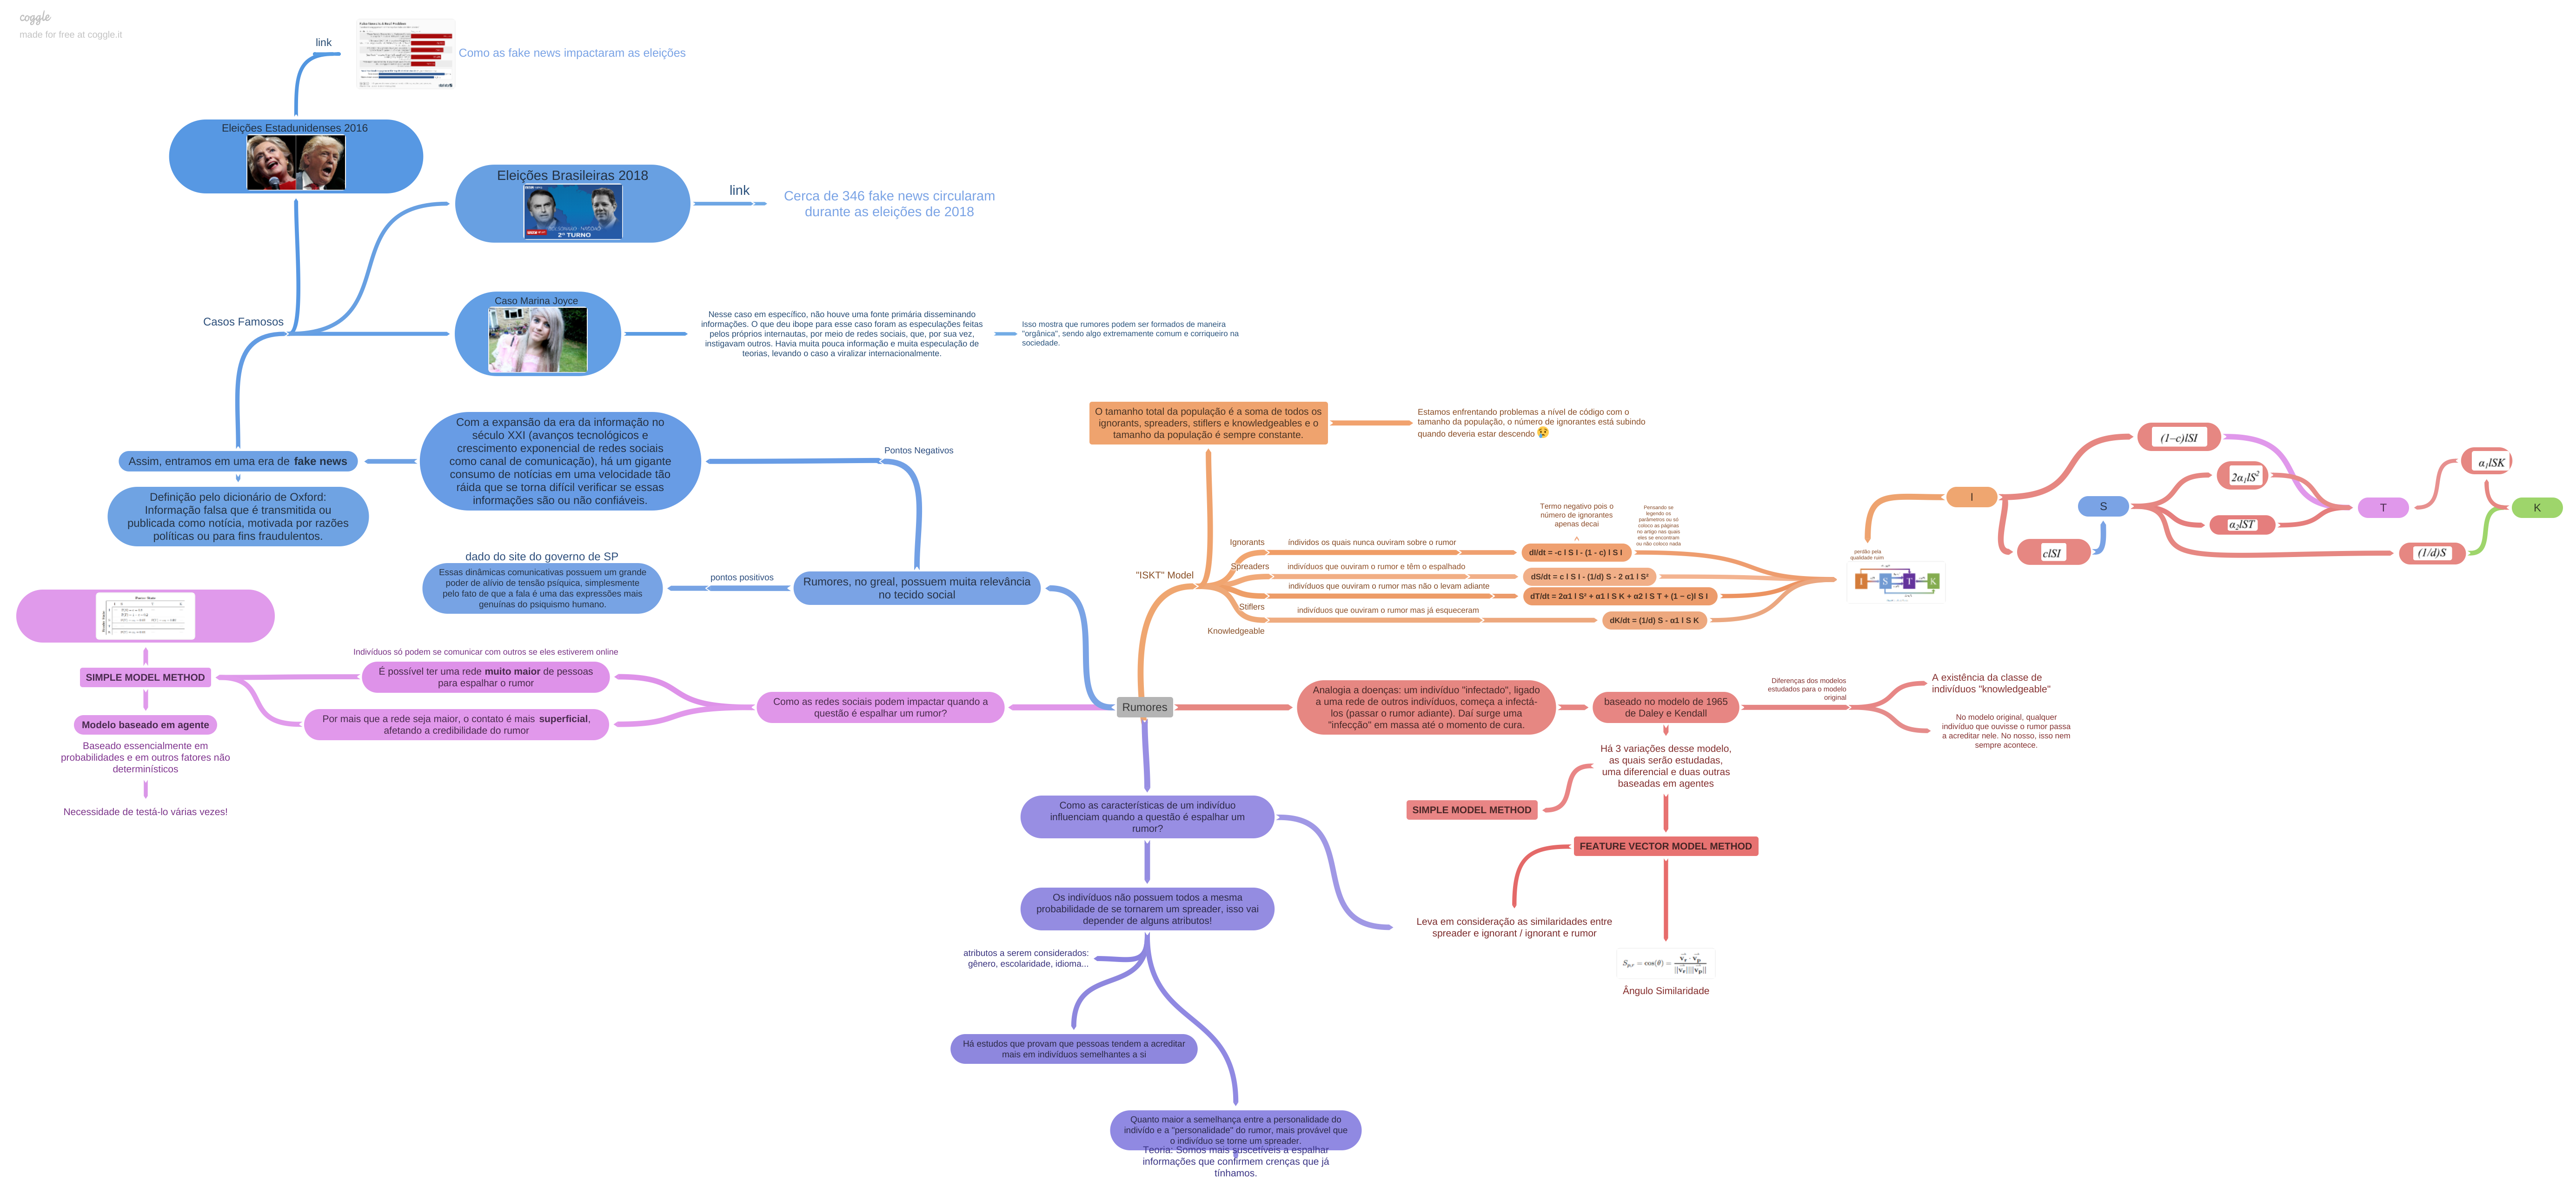



# Modelo

O Modelo ISTK apresenta quatro categorias para a população



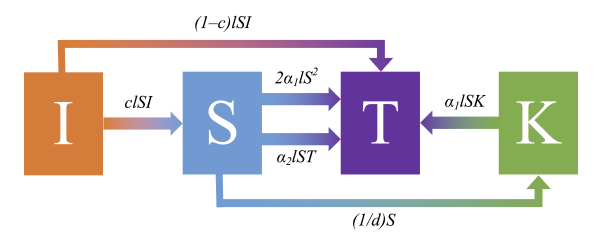

Para os ignorant, temos:
> I' = −clSI − (1 − c)lSI

Para os spreaders, temos:
> S' = clSI − (1/d)S − 2α1lS2 − α2lST

Para os stiflers, temos:
> T' =  2α1lS2 + α1lSK + α2lST + (1 − c)lSI

Para os knowledgeable, temos:
> K' = (1/d)S − α1lSK

Para os parâmetros, temos:
> c = 2.8/7
> l = 1 - (1-S/N)**22
> a1 = 0.01
> a2 = 0.02
> d = 8

##Estimação de parâmetros

Para estimar, foram essenciais os seguintes parâmetros: a credibilidade (c) do rumor, cujo valor foi determinado após consulta a diversas fontes de informação [2]; o período em dias (d) antes do qual o rumor é esquecido; e as taxas de interações diárias (l). Além destes, a inclusão de um parâmetro que introduzisse uma "taxa de novidade" para o rumor (a1) tornou-se imprescindível, bem como a probabilidade de conversão de spreaders em stiflers (a2).


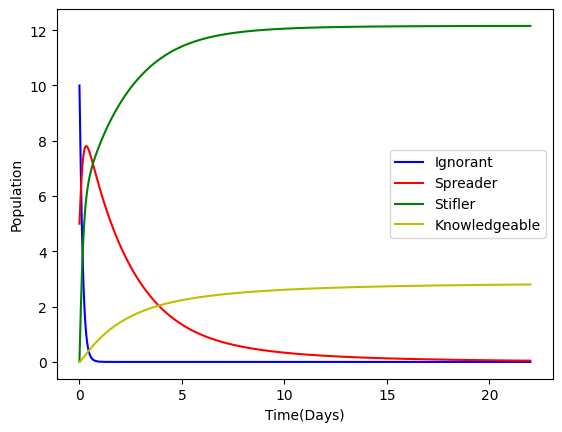

In [ ]:
#Mostrar os gráficos do modelo ISTK
import numpy as np;
from scipy.integrate import odeint
import matplotlib.pyplot as plt;

def odes (x, t):
  I = x[0] #Ignorants
  S = x[1] #Spreaders
  T = x[2] #Stiflers
  K = x[3] #Knowledgeables
  N = I + S + T + K

  c = 2.8/7 #Credibiidade do rumor
  l = 1-(1-S/N)**22 #Chance por dia de interação com Spreader
  a1 = 0.01 #Descreve o rumor saindo de moda, virando noticia velha
  a2 = 0.02 #Chance de Spreader virar stifler ao contato com um stifler
  d = 8 # Dias até a população esquecer o rumor

  dIdt = -c*l*S*I - (1-c)*l*S*I
  dSdt = c*l*S*I - S/d - 2*a1*l*(S**2) - a2*l*S*T
  dTdt = 2*a1*l*(S**2) + a1*l*S*K + a2*l*S*T + (1 - c)*l*S*I
  dKdt = S/d - a1*l*S*K
  return [dIdt, dSdt, dTdt, dKdt]

x0 = [10, 5, 0, 0]
t = np.linspace(0, 22, 1000)
X = odeint(odes, x0, t)
plt.plot(t, X[:,0], 'b', label = 'Ignorant')
plt.plot(t, X[:,1], 'r', label = 'Spreader')
plt.plot(t, X[:,2], 'g', label = 'Stifler')
plt.plot(t, X[:,3], 'y', label = 'Knowledgeable')
plt.xlabel('Time(Days)')
plt.ylabel('Population')
plt.legend()
plt.show()

# Resultados Preliminares

A análise gráfica revela uma mudança inesperadamente rápida no comportamento, porém, as tendências gerais das curvas seguem o padrão antecipado: observa-se uma diminuição nos indivíduos "ignorantes" e um aumento nos "stiflers". No entanto, ainda não temos certeza dos resultados. Por exemplo, notamos um fenômeno curioso: ao aumentar o número de "Ignorantes" (por exemplo, 500), observa-se um tempo de convergência menor para a estabilidade, contrariando as expectativas de um tempo maior. Esta discrepância suscita questionamentos sobre variáveis como "N", relacionada ao tamanho da população, que, ao ser impressa, revelou valores quase constantes como o esperado, ou ainda a respeito dos parâmetros empregados. Uma análise mais aprofundada é planejada para descobrir a origem dessa diferença, seja na formulação das equações diferenciais ou em outros aspectos. Prosseguiremos com investigações adicionais para identificar a causa  e, posteriormente, resolver os problemas ainda existentes.

# Conclusão

A modelagem da disseminação de Fake News e informações virais usando Equações Diferenciais Ordinárias (ODEs) ajuda a compreender os fatores que afetam esses fenômenos, incluindo velocidade de compartilhamento e influência das redes sociais. Essa abordagem permite prever cenários e desenvolver estratégias para mitigar os efeitos negativos, contribuindo para uma sociedade mais informada e resistente às Fake News.



#Referências

>[1]HARARI, Yuval Noah. Sapiens: uma breve história da humanidade. São Paulo. Editora Companhia das Letras , 2015.

>[2]DABKE, Devavrat V. and ARROYO, Eva E. Rumors with Personality: A Differential and Agent-Based Model of Information Spread through Networks
